<a href="https://colab.research.google.com/github/Rogerio-mack/fNIRS/blob/main/fnirs_HDF5_Fernanda_TCC_download_modified_snirf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento dos dados em formato `.snirf`. 

Acesse [Shared Near Infrared Spectroscopy Format (SNIRF)](https://github.com/fNIRS/snirf) para especificação do formato `.snirf`. Aqui empregamos a versão [snirf v1.0](https://github.com/fNIRS/snirf/blob/v1.0/snirf_specification.md).

**Entrada:**

> * Dados `.snirf` 

**Saída:**

> Faz as seguintes alterações criando novos arquivos `.snirf` (dentre outros, ajustes requeridos para uso no `NME-nirs`):

> * Inclui registro AppName b'snirf-Mack' para identificar os dados tratados nos arquivos
> * ZERA canais com sinais < 0
> * Ajusta `time` para intervalos de tempo constante
> * Cria a partir dos registros `aux` do `.snirf` registros `.stim` de estímulos
> * Correção dos estímulos `aux1` (4 estímulos) e `aux3` (6 estímulos) (experimento da Fernanda) 
> * Retifica estímulos para tempo de 18s (experimento da Fernanda) 
> * Cria o estímulo `rest` complementar de intervalo entre os estímulos retificados
> * Valida a carga dos dados com o `NME-nirs`
> * Exibe ao final a média de HbO/HbR dos estímulos `aux1` $\times$ `rest`
> * Download new `.snirf` file







## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Common Imports

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import compress

In [3]:
import h5py
import numpy as np

## Copiando o arquivo original para um novo arquivo local

A ideia é que possamos modificar um arquivo `.snirf` original eliminando coletas indesejadas e fazendo ajustes para análise.

In [4]:
path_in = '/content/drive/MyDrive/coletas IC TCC/dados em .snirf/'
path_out = '/content/new_'

print('Path file: ' + path_in )

file = input('Entre com arquivo .snirf do diretório acima que deseja processar ou <enter> para processar JMVR_TCC_40.snirf')
if file == '':
  file = 'JMVR_TCC_40.snirf'

print('Processing file: ' + path_in + file)

fs = h5py.File(path_in + file,'r')
fd = h5py.File(path_out + file,'w')

fs.copy('formatVersion',fd,'formatVersion')
fs.copy('nirs',fd,'nirs')

fd.close()
fs.close()

Path file: /content/drive/MyDrive/coletas IC TCC/dados em .snirf/
Entre com arquivo .snirf do diretório acima que deseja processar ou <enter> para processar JMVR_TCC_40.snirfJMVR_TCC_39.snirf
Processing file: /content/drive/MyDrive/coletas IC TCC/dados em .snirf/JMVR_TCC_39.snirf


## Lendo o novo arquivo 

In [5]:
data = h5py.File(path_out + file,'r+')

In [6]:
if data.keys() != h5py.File(path_in + file,'r').keys():
  print('Error: new snirf file with different keys from source')

In [7]:
list(data.keys())

['formatVersion', 'nirs']

## Explorando os dados do `.snirf`

Aqui várias explorações úteis dos dados do `.snirf`.

In [8]:
data['formatVersion'][0]

b'1.0'

In [9]:
list(data['nirs'].keys())

['aux1',
 'aux2',
 'aux3',
 'aux4',
 'aux5',
 'aux6',
 'aux7',
 'aux8',
 'data1',
 'metaDataTags',
 'probe',
 'stim01',
 'stim1']

### Criando *alias* para os dados

In [10]:
for key in data['nirs'].keys():
  exp = key + ' = data["nirs"]["' + key + '"] '
  print(exp)
  exec(exp)

aux1 = data["nirs"]["aux1"] 
aux2 = data["nirs"]["aux2"] 
aux3 = data["nirs"]["aux3"] 
aux4 = data["nirs"]["aux4"] 
aux5 = data["nirs"]["aux5"] 
aux6 = data["nirs"]["aux6"] 
aux7 = data["nirs"]["aux7"] 
aux8 = data["nirs"]["aux8"] 
data1 = data["nirs"]["data1"] 
metaDataTags = data["nirs"]["metaDataTags"] 
probe = data["nirs"]["probe"] 
stim01 = data["nirs"]["stim01"] 
stim1 = data["nirs"]["stim1"] 


In [11]:
list(metaDataTags.keys())

['AppName',
 'FrequencyUnit',
 'LengthUnit',
 'MeasurementDate',
 'MeasurementTime',
 'SnirfDraft',
 'SubjectID',
 'TimeUnit']

### Alterando o arquivo com a informação `snirf-Mack` 

Metadados podem variar bastante de arquivo para arquivo. Por exemplo, para dados `.snirf` gerados pelo `Homer3` você encontrará o campo `Appname` com `Homer3`.

In [12]:
if list(metaDataTags.keys()).count('AppName') == 1:
  metaDataTags['AppName'][...] = ['snirf-Mack']
else:
  metaDataTags['AppName'] = np.array(['snirf-Mack'],dtype='|S13')

for key, item in metaDataTags.items():
  print(key, item[0])

AppName b'snirf-Mack'
FrequencyUnit b'unknown'
LengthUnit b'mm'
MeasurementDate b'2021-12-04'
MeasurementTime b'15:12:45'
SnirfDraft b'3'
SubjectID b'default'
TimeUnit b'unknown'


In [13]:
list(data1.keys())

['dataTimeSeries',
 'measurementList1',
 'measurementList10',
 'measurementList11',
 'measurementList12',
 'measurementList13',
 'measurementList14',
 'measurementList15',
 'measurementList16',
 'measurementList17',
 'measurementList18',
 'measurementList19',
 'measurementList2',
 'measurementList20',
 'measurementList21',
 'measurementList22',
 'measurementList23',
 'measurementList24',
 'measurementList25',
 'measurementList26',
 'measurementList27',
 'measurementList28',
 'measurementList29',
 'measurementList3',
 'measurementList30',
 'measurementList31',
 'measurementList32',
 'measurementList4',
 'measurementList5',
 'measurementList6',
 'measurementList7',
 'measurementList8',
 'measurementList9',
 'time']

In [14]:
aux_list = [x for x in list(data['nirs'].keys()) if x.find('aux') == 0]
aux_list

['aux1', 'aux2', 'aux3', 'aux4', 'aux5', 'aux6', 'aux7', 'aux8']

In [15]:
if len(aux_list) > 0:
  for a in aux_list:
    for key, item in data['nirs'][a].items():
      print(key, item[:])
else:
  print('Warning: no aux records in .snirf')      

dataTimeSeries [0.00305176 0.00274658 0.00213623 ... 0.00274658 0.00244141 0.00244141]
name [b'aux1']
time [0.00000000e+00 1.00000001e-01 2.00000003e-01 ... 2.02390002e+03
 2.02400000e+03 2.02409998e+03]
timeOffset [0.]
dataTimeSeries [0.00244141 0.00274658 0.00244141 ... 0.00213623 0.00274658 0.00244141]
name [b'aux2']
time [0.00000000e+00 1.00000001e-01 2.00000003e-01 ... 2.02390002e+03
 2.02400000e+03 2.02409998e+03]
timeOffset [0.]
dataTimeSeries [0.00183105 0.00213623 0.00244141 ... 0.00274658 0.00213623 0.00183105]
name [b'aux3']
time [0.00000000e+00 1.00000001e-01 2.00000003e-01 ... 2.02390002e+03
 2.02400000e+03 2.02409998e+03]
timeOffset [0.]
dataTimeSeries [0.00213623 0.00183105 0.00213623 ... 0.00274658 0.00274658 0.00183105]
name [b'aux4']
time [0.00000000e+00 1.00000001e-01 2.00000003e-01 ... 2.02390002e+03
 2.02400000e+03 2.02409998e+03]
timeOffset [0.]
dataTimeSeries [0.00213623 0.00213623 0.00213623 ... 0.00244141 0.00244141 0.00274658]
name [b'aux5']
time [0.00000000e+

In [16]:
print( probe['detectorLabels'][ int(data['nirs']['data1']['measurementList1']['detectorIndex'][0]) - 1 ] )
print( probe['sourceLabels'][ int(data['nirs']['data1']['measurementList1']['sourceIndex'][0]) - 1 ] )

b'D2'
b'S1'


In [17]:
measurements = [ x for x in list( data['nirs']['data1'].keys() ) if x.find('measurementList') == 0 ]

for m in measurements:
  print( m,
         str(data['nirs']['probe']['detectorLabels'][ int(data['nirs']['data1'][m]['detectorIndex'][0]) - 1 ],'UTF-8'), 
         data['nirs']['probe']['sourceLabels'][ int(data['nirs']['data1'][m]['sourceIndex'][0]) - 1 ].decode('UTF-8') )
  

measurementList1 D2 S1
measurementList10 D1 S2
measurementList11 D4 S2
measurementList12 D4 S2
measurementList13 D5 S2
measurementList14 D5 S2
measurementList15 D13 S2
measurementList16 D13 S2
measurementList17 D10 S3
measurementList18 D10 S3
measurementList19 D6 S3
measurementList2 D2 S1
measurementList20 D6 S3
measurementList21 D7 S3
measurementList22 D7 S3
measurementList23 D8 S3
measurementList24 D8 S3
measurementList25 D1 S4
measurementList26 D1 S4
measurementList27 D11 S4
measurementList28 D11 S4
measurementList29 D8 S4
measurementList3 D3 S1
measurementList30 D8 S4
measurementList31 D9 S4
measurementList32 D9 S4
measurementList4 D3 S1
measurementList5 D4 S1
measurementList6 D4 S1
measurementList7 D12 S1
measurementList8 D12 S1
measurementList9 D1 S2


## Create Channels Table

In [18]:
measurements = [ x for x in list( data1.keys() ) if x.find('measurementList') == 0 ]

measure_idx = []
name = []
source =  []
detector = []
source_pos = []
detector_pos = []
source_pos_3D = []
detector_pos_3D = []
flag_2D = True
flag_3D = True
frequencies = []

for m in measurements:
  measure_idx.append( int( m[ len('measurementList'):: ] ) )
  
  e_name = probe['sourceLabels'][ int(data1[m]['sourceIndex'][0]) - 1 ].decode('UTF-8') + '_' + probe['detectorLabels'][ int(data1[m]['detectorIndex'][0]) - 1 ].decode('UTF-8') 
  e_source = int(data1[m]['sourceIndex'][0])   
  e_detector = int(data1[m]['detectorIndex'][0]) 
  
  if list(probe.keys()).count('sourcePos2D') > 0 and list(probe.keys()).count('detectorPos2D') > 0: 
    e_source_pos = probe['sourcePos2D'][ int(data1[m]['sourceIndex'][0]) - 1 ] # .decode('UTF-8')
    e_detector_pos = probe['detectorPos2D'][ int(data1[m]['detectorIndex'][0]) - 1 ] # .decode('UTF-8')
  else:
    flag_2D = False
    e_source_pos = e_detector_pos = np.array([0,0],dtype=float)

  # e_frequencies = probe['frequencies'][0]

  if list(probe.keys()).count('sourcePos3D') > 0 and list(probe.keys()).count('detectorPos3D') > 0:
    e_source_pos_3D = probe['sourcePos3D'][ int(data1[m]['sourceIndex'][0]) - 1 ] # .decode('UTF-8')
    e_detector_pos_3D = probe['detectorPos3D'][ int(data1[m]['detectorIndex'][0]) - 1 ] # .decode('UTF-8')
  else:
    flag_3D = False
    e_source_pos_3D = e_detector_pos_3D = np.array([0,0,0],dtype=float)

  name.append( e_name )
  source.append( e_source )
  detector.append( e_detector )
  source_pos.append( e_source_pos )
  detector_pos.append( e_detector_pos )
#  frequencies.append( e_frequencies )
  source_pos_3D.append( e_source_pos_3D )
  detector_pos_3D.append( e_detector_pos_3D )

if not flag_2D:
  print('\nWARNING: no source, detector pos 2D available\n')

if not flag_3D:
  print('\nWARNING: no source, detector pos 3D available\n')

print(measure_idx)  
print(name)  
print(source)
print(detector)
print(source_pos)
print(detector_pos)
print(frequencies)
print(source_pos_3D)
print(detector_pos_3D)

[1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 4, 5, 6, 7, 8, 9]
['S1_D2', 'S2_D1', 'S2_D4', 'S2_D4', 'S2_D5', 'S2_D5', 'S2_D13', 'S2_D13', 'S3_D10', 'S3_D10', 'S3_D6', 'S1_D2', 'S3_D6', 'S3_D7', 'S3_D7', 'S3_D8', 'S3_D8', 'S4_D1', 'S4_D1', 'S4_D11', 'S4_D11', 'S4_D8', 'S1_D3', 'S4_D8', 'S4_D9', 'S4_D9', 'S1_D3', 'S1_D4', 'S1_D4', 'S1_D12', 'S1_D12', 'S2_D1']
[1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 2]
[2, 1, 4, 4, 5, 5, 13, 13, 10, 10, 6, 2, 6, 7, 7, 8, 8, 1, 1, 11, 11, 8, 3, 8, 9, 9, 3, 4, 4, 12, 12, 1]
[array([-0.73568031, -0.31736099]), array([-0.39062417,  0.238856  ]), array([-0.39062417,  0.238856  ]), array([-0.39062417,  0.238856  ]), array([-0.39062417,  0.238856  ]), array([-0.39062417,  0.238856  ]), array([-0.39062417,  0.238856  ]), array([-0.39062417,  0.238856  ]), array([ 0.7869124 , -0.30189636]), array([ 0.7869124 , -0.30189636]), array([ 0.7869124 , -0.3018963

In [19]:
measures = pd.DataFrame({'measure_idx':measure_idx,
                         'name':name,
                         'source':source,
                         'detector':detector,
#                         'frequencies':frequencies,
                         'source_pos':source_pos,
                         'detector_pos':detector_pos,
                         'source_pos_3D':source_pos_3D,
                         'detector_pos_3d':detector_pos_3D}) # .sort_values('measure_idx').reset_index(drop=True)
# measures.head()


In [20]:
wavelength = []

for m in measurements:
  wavelength.append( str(int(probe['wavelengths'][ int(data1[m]['wavelengthIndex'][0]) - 1 ])) )
#  print( m,str(int(probe['wavelengths'][ int(data1[m]['wavelengthIndex'][0]) - 1 ]))  )

# wavelength
measures['wavelength'] = wavelength 
measures['name'] = measures['name'] + '_' + wavelength 
measures.set_index('measure_idx',inplace=True) 

In [21]:
measures = measures[['name', 'source', 'detector', 'wavelength', 'source_pos', 'detector_pos',
       'source_pos_3D', 'detector_pos_3d']]
measures = measures.rename_axis('')
measures.head()

,name,source,detector,wavelength,source_pos,detector_pos,source_pos_3D,detector_pos_3d
,,,,,,,,
1,S1_D2_685,1,2,685,"[-0.7356803125467147, -0.31736099489885317]","[-0.7994162867219375, -0.5078237711487235]","[-0.7356803125467147, -0.31736099489885317, 0....","[-0.7994162867219375, -0.5078237711487235, -0...."
10,S2_D1_830,2,1,830,"[-0.3906241672439174, 0.2388560049021952]","[-0.019720429240986857, 0.3711155846322631]","[-0.3906241672439174, 0.2388560049021952, 0.06...","[-0.019720429240986857, 0.3711155846322631, 0...."
11,S2_D4_685,2,4,685,"[-0.3906241672439174, 0.2388560049021952]","[-0.6391637018867674, 0.00930356002602185]","[-0.3906241672439174, 0.2388560049021952, 0.06...","[-0.6391637018867674, 0.00930356002602185, -0...."
12,S2_D4_830,2,4,830,"[-0.3906241672439174, 0.2388560049021952]","[-0.6391637018867674, 0.00930356002602185]","[-0.3906241672439174, 0.2388560049021952, 0.06...","[-0.6391637018867674, 0.00930356002602185, -0...."
13,S2_D5_685,2,5,685,"[-0.3906241672439174, 0.2388560049021952]","[-0.4296163680476065, 0.2658197590046889]","[-0.3906241672439174, 0.2388560049021952, 0.06...","[-0.4296163680476065, 0.2658197590046889, -0.1..."


## Create Raw Table

In [22]:
raw = pd.concat([pd.DataFrame(data1['time']), pd.DataFrame(data1['dataTimeSeries'])], axis=1)
raw.columns = ['time'] + list(measures.name) 
raw.head()

,time,S1_D2_685,S2_D1_830,S2_D4_685,S2_D4_830,S2_D5_685,S2_D5_830,S2_D13_685,S2_D13_830,S3_D10_685,S3_D10_830,S3_D6_685,S1_D2_830,S3_D6_830,S3_D7_685,S3_D7_830,S3_D8_685,S3_D8_830,S4_D1_685,S4_D1_830,S4_D11_685,S4_D11_830,S4_D8_685,S1_D3_685,S4_D8_830,S4_D9_685,S4_D9_830,S1_D3_830,S1_D4_685,S1_D4_830,S1_D12_685,S1_D12_830,S2_D1_685
0,0.0,8252.912109,52562.117188,1300.206665,14096.754883,5420.255371,35773.769531,3426.891846,17720.560547,430.986755,1481.375488,1084.673218,6293.525391,8338.804688,32351.064453,542.619690,2530.424805,899.483154,5419.706543,8939.895508,37235.007812,2852.900146,16319.877930,2691.202637,18369.376953,11026.172852,33346.824219,2705.045166,6444.630371,3014.802246,10765.773438,13172.582031,30798.843750
1,0.1,7592.035156,49904.746094,1158.938477,13884.893555,5294.812500,34793.574219,3472.167969,17957.759766,356.349518,1576.356567,1213.738892,6263.340332,8620.742188,33782.871094,589.084045,2787.306152,958.088684,5458.232422,8812.347656,34618.523438,3018.903809,17727.355469,2763.215332,17649.779297,10421.363281,32851.914062,2728.173340,6645.173340,2724.812500,10159.783203,12816.060547,31034.431641
2,0.2,7806.838379,50757.148438,1229.424072,13971.141602,5323.121094,35363.679688,3495.104492,18179.287109,301.552002,1577.901489,1164.146606,6444.322266,8622.803711,34233.957031,587.684021,2834.211914,967.276611,5498.581055,9057.722656,35191.839844,3112.246826,17980.371094,2819.403320,17920.154297,10584.108398,33159.882812,2738.663574,6709.832031,2812.317139,10314.124023,12879.951172,31389.568359
3,0.3,7832.388184,50923.476562,1172.728271,13939.741211,5282.297363,35358.328125,3490.140625,18183.322266,392.067047,1588.546265,1178.789062,6447.038086,8608.253906,34211.789062,587.790283,2826.756104,965.268494,5485.475586,9070.246094,35121.339844,3010.352051,17971.714844,2747.456787,17836.015625,10513.363281,33188.238281,2731.593994,6722.302246,2789.634277,10454.127930,12911.707031,31413.550781
4,0.4,7851.699219,50846.230469,1185.281006,14011.913086,5277.338867,35377.632812,3486.728027,18243.167969,362.060547,1797.701904,1067.134399,6588.869141,8633.307617,34220.796875,583.019409,2829.911377,974.716858,5499.685547,9081.237305,35668.765625,3141.687012,17929.378906,2808.352051,17951.964844,10454.154297,33364.359375,2737.253174,6737.093262,2740.896973,10386.346680,12909.279297,31489.972656


In [23]:
def plotchannels(df, ncols_display=4, title='Display Channels',reds=False):
  nr_channels = len(df.columns) - 1
  ncols= ncols_display
  if nr_channels%ncols == 0:
    nrows= int(nr_channels/ncols)
  else:
    nrows= int(nr_channels/ncols + 1)

  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=False, figsize=(ncols*5,nrows*3.5))

  i = 0
  for c in df.drop(columns='time'):
    if reds:
      ax[i//ncols,i%ncols].plot(df.index, df[c], color=['blue','red'][df[c].min() < 0] )
    else:
      ax[i//ncols,i%ncols].plot(df.index, df[c], color='blue')
    ax[i//ncols,i%ncols].set_title(c, fontsize=12, weight='bold')
    i = i + 1
    plt.xticks([])
  
  plt.suptitle(title, fontsize=14, weight='bold',y=0.90)
  plt.show()

  return

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out  

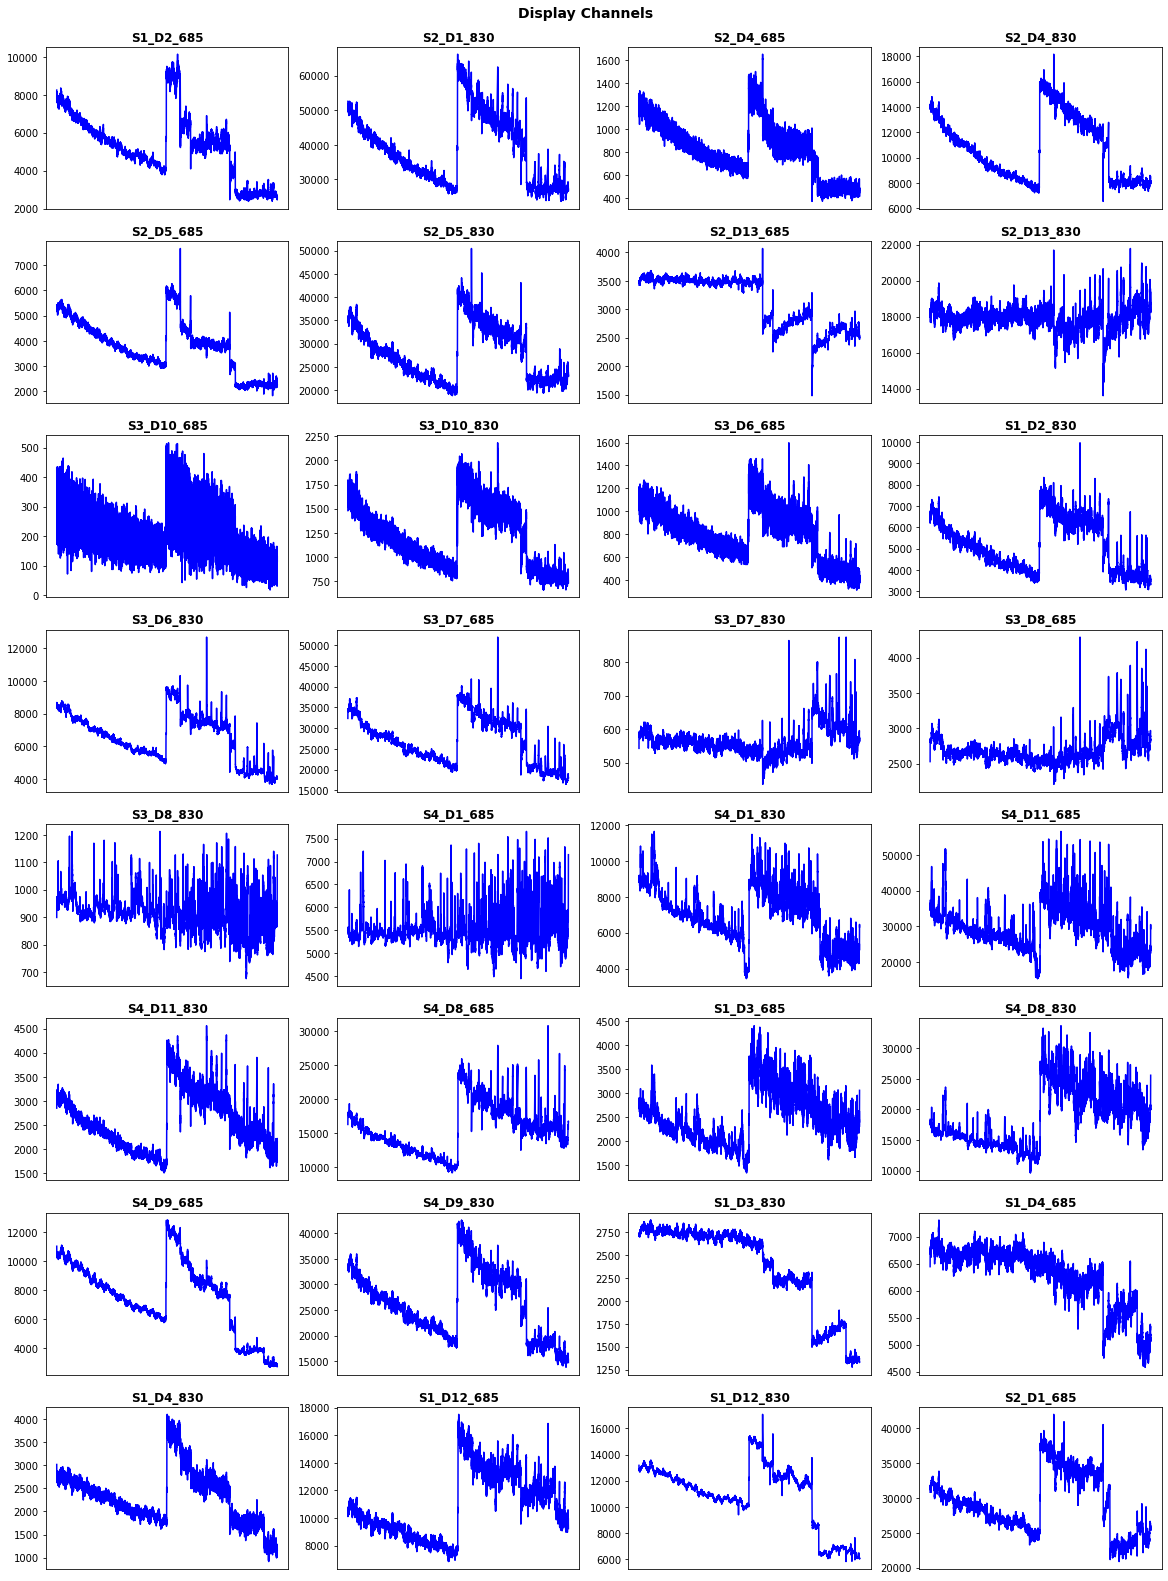

In [24]:
plotchannels(raw,reds=True)

### Correct `time` 

Only regular steps for time (in NME causes `sfreq` error).

In [25]:
data1['time'][0:10]

array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
       0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998])

In [26]:
data1['time'].shape[0]

20242

In [27]:
data1['time'][...] = np.arange(1, data1['time'].shape[0]+1, 1) / 10

### Raw with bad signals (negative) receive all $0$

In [28]:
for c in raw.drop(columns='time'):
  if raw[c].min() < 0:
    print( c, list(raw.columns).index(c) - 1 )

In [29]:
for c in raw.drop(columns='time'):
  if raw[c].min() < 0:
#    raw[c] = 0
    print( c, list(raw.columns).index(c) - 1 )
    data1['dataTimeSeries'][:, list(raw.columns).index(c) - 1 ] = .0 

In [30]:
for c in raw.drop(columns='time'):
  if raw[c].min() < 0:
    raw[c] = .0 
    print( c, list(raw.columns).index(c) - 1 )
#   data1['dataTimeSeries'][:, list(raw.columns).index(c) - 1 ] = 0

## Create Stimulus from Stimulus or Aux

In [31]:
stim_list = [x for x in list(data['nirs'].keys()) if x.find('stim') == 0]

In [32]:
stim_list

['stim01', 'stim1']

In [33]:
stim_true = False

for s in stim_list:
  if list(data['nirs'][s].keys()) == ['data','name']: # data, name
    if data['nirs'][s]['data'].shape[1] == 3: # start, duration, value
      stim_true = True

if not stim_true:
  print('\nWARNING: it seems there is no valid stim records. At least a stim record without start, duration, value. Trying to use stimulus from aux channels.\n')
else:
  print('\nWARNING: using stim records for stimulus.\n') 

In [34]:
if not stim_true:
  for s in stim_list:
    del data['nirs'][s]
    print('WARNING: stimulus record ' + s + ' deleted')

In [35]:
aux_list = [x for x in list(data['nirs'].keys()) if x.find('aux') == 0]
aux_list

['aux1', 'aux2', 'aux3', 'aux4', 'aux5', 'aux6', 'aux7', 'aux8']

In [36]:
for a in aux_list:
  print( data['nirs'][a].keys() )

stim_aux = False

for a in aux_list:
  if list(data['nirs'][a].keys()) == ['dataTimeSeries', 'name', 'time', 'timeOffset']: 
    stim_aux = True

if not stim_aux:
  print('\nWARNING: it seems there is no valid aux stim records. At least a aux record without dataTimeSeries, name, time or timeOffset. No stimulus data available.\n')
else:
  print('\nWARNING: using aux stim records for stimulus.\n') 

<KeysViewHDF5 ['dataTimeSeries', 'name', 'time', 'timeOffset']>
<KeysViewHDF5 ['dataTimeSeries', 'name', 'time', 'timeOffset']>
<KeysViewHDF5 ['dataTimeSeries', 'name', 'time', 'timeOffset']>
<KeysViewHDF5 ['dataTimeSeries', 'name', 'time', 'timeOffset']>
<KeysViewHDF5 ['dataTimeSeries', 'name', 'time', 'timeOffset']>
<KeysViewHDF5 ['dataTimeSeries', 'name', 'time', 'timeOffset']>
<KeysViewHDF5 ['dataTimeSeries', 'name', 'time', 'timeOffset']>
<KeysViewHDF5 ['dataTimeSeries', 'name', 'time', 'timeOffset']>




In [37]:
if stim_true:

  stim_name_set = set() 

  for s in stim_list: 
    stim_name_set.add( data['nirs'][s]['name'][0].decode('utf8') )

  stim_name_set = list(stim_name_set)
  stim_name_set 

In [38]:
for a in aux_list:
  data['nirs'][a]['time'][...] = data1['time'][:] # ajusta o tempo
  data['nirs'][a]['dataTimeSeries'][:] = np.round(   data['nirs'][a]['dataTimeSeries'][:], 0) # ajusta o impulso

# Create Stimulus from Aux

In [39]:
for a in aux_list:

  stim = 'stim' + a.split('aux')[1]
  data['nirs'].create_group(stim)
  data['nirs'][stim].create_dataset('name', data=np.array([data['nirs'][a]['name'][0]]).astype('|O'))

  start = []
  end = []
  value = []

  start_bool = False

  for i in range( len( aux1['dataTimeSeries'] ) ):
    if data['nirs'][a]['dataTimeSeries'][i] != 0 and not start_bool:
      value.append( data['nirs'][a]['dataTimeSeries'][i] )
      start.append( data['nirs'][a]['time'][i] )
      start_bool = True
    else: 
      if data['nirs'][a]['dataTimeSeries'][i] == 0 and start_bool:  
        end.append( data['nirs'][a]['time'][i-1] )
        start_bool = False

  data['nirs'][stim].create_dataset('data', data=np.array( [np.array(start) , np.array(end) - np.array(start) , np.array(value)] ).T)


In [40]:
for a in aux_list:
  if data['nirs'][a]['timeOffset'][0] != 0:
    print('WARNING: aux record ' + a + ' with timeOffset different from 0. timeOffset will be ignored when transformed to stim records.')

In [41]:
data['nirs']['stim2']['data'][:]

array([[ 249.6,   36.1,    5. ],
       [ 577.9,   49. ,    5. ],
       [1328.4,   22.2,    5. ],
       [1368.7,   22.2,    5. ],
       [1719.8,   23. ,    5. ]])

In [42]:
data['nirs']['stim2']['name'][0]

b'aux2'

In [43]:
stim_true = True

stim_list = [x for x in list(data['nirs'].keys()) if x.find('stim') == 0]



  

In [44]:
# del data['nirs']['stim9']
stim_list = [x for x in list(data['nirs'].keys()) if x.find('stim') == 0]

# Retifica estímulos para 18s

In [45]:
if stim_true:
  for s in stim_list:
    data['nirs'][s]['data'][:,1] = np.ones( data['nirs'][s]['data'].shape[0] )*18
  
  data['nirs']['stim1']['data'][:] 

In [46]:
start = []
stim_ = []

if stim_true:
  for s in stim_list[0:-1]:
    for i in range( data['nirs'][s]['data'].shape[0] ):
      start.append( data['nirs'][s]['data'][i,0] )
      stim_.append(s)


  df_temp = pd.DataFrame({'stim_':stim_, 'start':start}) 


In [47]:
df_temp = df_temp.sort_values('start')

In [48]:
df_temp.reset_index(drop=True, inplace=True)
df_temp

,stim_,start
0,stim6,76.3
1,stim6,130.8
2,stim5,182.7
3,stim2,249.6
4,stim5,303.8
5,stim7,355.0
6,stim4,411.5
7,stim6,524.8
8,stim2,577.9
9,stim5,645.0


# Ajusta os estímulos 1 e 3

In [49]:
df_temp[df_temp.stim_ == 'stim1']

,stim_,start
17,stim1,1195.7
24,stim1,1542.4
26,stim1,1626.8
34,stim1,1971.1


In [50]:
df_temp.groupby('stim_').stim_.count()

stim_
stim1    4
stim2    5
stim3    6
stim4    5
stim5    5
stim6    5
stim7    5
Name: stim_, dtype: int64

In [51]:
data['nirs']['stim3']['data'][:]

array([[1045.7,   18. ,    5. ],
       [1146.7,   18. ,    5. ],
       [1448.3,   18. ,    5. ],
       [1495. ,   18. ,    5. ],
       [1584.2,   18. ,    5. ],
       [1666.8,   18. ,    5. ]])

In [52]:
data['nirs']['stim1']['data'][:] 

array([[1195.7,   18. ,    5. ],
       [1542.4,   18. ,    5. ],
       [1626.8,   18. ,    5. ],
       [1971.1,   18. ,    5. ]])

In [53]:
stim_new =   np.array([np.array(data['nirs']['stim1']['data'][0]),
             np.array(data['nirs']['stim3']['data'][3]),
             np.array(data['nirs']['stim1']['data'][1]),
             np.array(data['nirs']['stim1']['data'][2]),
             np.array(data['nirs']['stim1']['data'][3])])

del data['nirs']['stim1']['data']
data['nirs']['stim1'].create_dataset('data', data=stim_new)

data['nirs']['stim1']['data'][:]

array([[1195.7,   18. ,    5. ],
       [1495. ,   18. ,    5. ],
       [1542.4,   18. ,    5. ],
       [1626.8,   18. ,    5. ],
       [1971.1,   18. ,    5. ]])

In [54]:
stim_new =   np.array([np.array(data['nirs']['stim3']['data'][0]),
             np.array(data['nirs']['stim3']['data'][1]),
             np.array(data['nirs']['stim3']['data'][2]),
             np.array(data['nirs']['stim3']['data'][4]),
             np.array(data['nirs']['stim3']['data'][5])])

del data['nirs']['stim3']['data']
data['nirs']['stim3'].create_dataset('data', data=stim_new)

data['nirs']['stim3']['data'][:]

array([[1045.7,   18. ,    5. ],
       [1146.7,   18. ,    5. ],
       [1448.3,   18. ,    5. ],
       [1584.2,   18. ,    5. ],
       [1666.8,   18. ,    5. ]])

# Complemento dos estímulos `rest`

In [55]:
if stim_true:

  stim = 'stim' + str( len(stim_list)+1 )
  data['nirs'].create_group(stim)
  data['nirs'][stim].create_dataset('name', data=np.array(['rest']).astype('|O'))

  start = []
  start_stim = []
  end = []
  value = []

  start_bool = False

  for s in stim_list:
    for i in range( data['nirs'][s]['data'].shape[0] ):
      start_stim.append( data['nirs'][s]['data'][i,0] )
      start.append( data['nirs'][s]['data'][i,0] + data['nirs'][s]['data'][i,1] )
      value.append(-1)

  start_stim = sorted(start_stim)
  start = sorted(start)

  for i in range(len(start_stim) - 1):
    end.append( start_stim[i+1] )

  start = start[0:-1]
  value = value[0:-1]

  data['nirs'][stim].create_dataset('data', data=np.array( [np.array(start) , np.array(end) - np.array(start) , np.array(value)] ).T)

print(start)
print(end)
print(start_stim)
print(value)

[94.3, 148.8, 200.7, 267.6, 321.8, 373.0, 429.5, 478.8, 542.8, 595.9, 663.0, 709.3, 756.9, 809.4, 859.1, 912.2, 958.0, 1015.9, 1063.7, 1118.0, 1164.7, 1213.7, 1257.2, 1302.2, 1346.4, 1386.7, 1427.0, 1466.3, 1513.0, 1560.4, 1602.2, 1644.8, 1684.8, 1737.8, 1778.9, 1824.2, 1864.8, 1905.6, 1947.4]
[130.8, 182.7, 249.6, 303.8, 355.0, 411.5, 460.8, 524.8, 577.9, 645.0, 691.3, 738.9, 791.4, 841.1, 894.2, 940.0, 997.9, 1045.7, 1100.0, 1146.7, 1195.7, 1239.2, 1284.2, 1328.4, 1368.7, 1409.0, 1448.3, 1495.0, 1542.4, 1584.2, 1626.8, 1666.8, 1719.8, 1760.9, 1806.2, 1846.8, 1887.6, 1929.4, 1971.1]
[76.3, 130.8, 182.7, 249.6, 303.8, 355.0, 411.5, 460.8, 524.8, 577.9, 645.0, 691.3, 738.9, 791.4, 841.1, 894.2, 940.0, 997.9, 1045.7, 1100.0, 1146.7, 1195.7, 1239.2, 1284.2, 1328.4, 1368.7, 1409.0, 1448.3, 1495.0, 1542.4, 1584.2, 1626.8, 1666.8, 1719.8, 1760.9, 1806.2, 1846.8, 1887.6, 1929.4, 1971.1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

In [56]:
stim_list = [x for x in list(data['nirs'].keys()) if x.find('stim') == 0]

stim_name_set = set() 

for s in stim_list: 
  stim_name_set.add( data['nirs'][s]['name'][0].decode('utf8') )

stim_name_set = list(stim_name_set)
stim_name_set 

if stim_true:
  print( data['nirs'][stim_list[-1]]['data'][:] )

[[ 9.4300e+01  3.6500e+01 -1.0000e+00]
 [ 1.4880e+02  3.3900e+01 -1.0000e+00]
 [ 2.0070e+02  4.8900e+01 -1.0000e+00]
 [ 2.6760e+02  3.6200e+01 -1.0000e+00]
 [ 3.2180e+02  3.3200e+01 -1.0000e+00]
 [ 3.7300e+02  3.8500e+01 -1.0000e+00]
 [ 4.2950e+02  3.1300e+01 -1.0000e+00]
 [ 4.7880e+02  4.6000e+01 -1.0000e+00]
 [ 5.4280e+02  3.5100e+01 -1.0000e+00]
 [ 5.9590e+02  4.9100e+01 -1.0000e+00]
 [ 6.6300e+02  2.8300e+01 -1.0000e+00]
 [ 7.0930e+02  2.9600e+01 -1.0000e+00]
 [ 7.5690e+02  3.4500e+01 -1.0000e+00]
 [ 8.0940e+02  3.1700e+01 -1.0000e+00]
 [ 8.5910e+02  3.5100e+01 -1.0000e+00]
 [ 9.1220e+02  2.7800e+01 -1.0000e+00]
 [ 9.5800e+02  3.9900e+01 -1.0000e+00]
 [ 1.0159e+03  2.9800e+01 -1.0000e+00]
 [ 1.0637e+03  3.6300e+01 -1.0000e+00]
 [ 1.1180e+03  2.8700e+01 -1.0000e+00]
 [ 1.1647e+03  3.1000e+01 -1.0000e+00]
 [ 1.2137e+03  2.5500e+01 -1.0000e+00]
 [ 1.2572e+03  2.7000e+01 -1.0000e+00]
 [ 1.3022e+03  2.6200e+01 -1.0000e+00]
 [ 1.3464e+03  2.2300e+01 -1.0000e+00]
 [ 1.3867e+03  2.2300e+01

In [57]:
if stim_aux:

  stimulus_aux = raw[['time']]

  for a in aux_list:
    stim_df = pd.DataFrame()
    stim_df[data['nirs'][a]['name'][0].decode('utf8')] = data['nirs'][a]['dataTimeSeries'][:]
    stimulus_aux = pd.concat([stimulus_aux,stim_df],axis=1)

  print(stimulus_aux.head())

   time  aux1  aux2  aux3  aux4  aux5  aux6  aux7  aux8
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
1   0.1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
2   0.2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3   0.3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
4   0.4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0


In [58]:
if stim_true:

  stimulus = raw[['time']]

  for s in stim_list:
    stim_df = pd.DataFrame()
    stim_df['time'] = data['nirs'][s]['data'][:,0]
    stim_df[s + '_duration'] = data['nirs'][s]['data'][:,1]
    stim_df[s] = data['nirs'][s]['data'][:,2]
    stimulus = pd.merge(stimulus,stim_df,how='left')

  stimulus = stimulus.fillna(0)
  stimulus

## Start Analysis with NME

In [59]:
!pip install nilearn

In [60]:
!pip install -U --no-deps https://github.com/mne-tools/mne-python/archive/main.zip

  Using cached https://github.com/mne-tools/mne-python/archive/main.zip


In [61]:
!pip install mne-nirs

In [62]:
print(path_out + file)

/content/new_JMVR_TCC_39.snirf


In [63]:
from mne.io import read_raw_nirx
from mne.preprocessing.nirs import (optical_density, beer_lambert_law,
                                    temporal_derivative_distribution_repair)

In [64]:
import mne 
raw_intensity = mne.io.read_raw_snirf(path_out + file, verbose=True)

raw_intensity.load_data()

Loading /content/new_JMVR_TCC_39.snirf
Reading 0 ... 20241  =      0.000 ...  2024.100 secs...


<RawSNIRF | new_JMVR_TCC_39.snirf, 32 x 20242 (2024.1 s), ~5.0 MB, data loaded>

## Converting from raw intensity to optical density

The raw intensity values are then converted to optical density.



In [65]:
raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)



## Evaluating the quality of the data

At this stage we can quantify the quality of the coupling
between the scalp and the optodes using the scalp coupling index. This
method looks for the presence of a prominent synchronous signal in the
frequency range of cardiac signals across both photodetected signals.

In this example the data is clean and the coupling is good for all
channels, so we will not mark any channels as bad based on the scalp
coupling index.



In [66]:
sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)
# fig, ax = plt.subplots()
# ax.hist(sci)
# ax.set(xlabel='Scalp Coupling Index', ylabel='Count', xlim=[0, 1])

In this example we will mark all channels with a SCI less than 0.5 as bad
(this dataset is quite clean, so no channels are marked as bad).



In [67]:
raw_od.info['bads'] = list(compress(raw_od.ch_names, sci < 0.5))

At this stage it is appropriate to inspect your data
(for instructions on how to use the interactive data visualisation tool
see `tut-visualize-raw`)
to ensure that channels with poor scalp coupling have been removed.
If your data contains lots of artifacts you may decide to apply
artifact reduction techniques as described in `ex-fnirs-artifacts`.



## Converting from optical density to haemoglobin

Next we convert the optical density data to haemoglobin concentration using
the modified Beer-Lambert law.



In [68]:
raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od)
# raw_haemo.plot(n_channels=len(raw_haemo.ch_names),
#                start=750,
#                duration=100, show_scrollbars=False)

In [69]:
raw_haemo.get_data()

array([[-4.98412028e-04, -4.20157795e-04, -4.45089899e-04, ...,
         4.21151084e-04,  3.47622055e-04,  4.06589231e-04],
       [-4.84068971e-04, -3.92872415e-04, -4.23507507e-04, ...,
         8.08415553e-04,  8.16109227e-04,  7.96581663e-04],
       [-3.18684102e-04, -3.68358724e-04, -3.39063403e-04, ...,
         2.59310291e-04,  3.06678239e-04,  2.97278932e-04],
       ...,
       [-2.66065821e-04, -1.82914382e-04, -2.09736992e-04, ...,
         6.42202288e-04,  6.47090132e-04,  6.26559007e-04],
       [ 1.13542824e-05, -3.77163743e-05, -6.75503495e-05, ...,
        -1.56506279e-04, -1.58716101e-04, -1.36782779e-04],
       [-2.27183989e-04, -1.87880851e-04, -1.90241516e-04, ...,
         7.38912499e-04,  7.36712500e-04,  7.35744339e-04]])

In [70]:
raw_haemo_df = pd.concat([raw[['time']], pd.DataFrame(raw_haemo.get_data().T)], axis=1)
raw_haemo_df.columns = ['time'] + list(measures.name) 
# raw_haemo_df

In [71]:
# plotchannels(raw_haemo_df.iloc[0:1000])

In [72]:
from sklearn.preprocessing import scale

raw_haemo_df_scale = raw_haemo_df.copy()

for c in raw_haemo_df.drop(columns='time'):
  raw_haemo_df_scale[c] = scale(raw_haemo_df[c])

In [73]:
# raw_haemo_df.head()

In [74]:
# raw_haemo_df_scale.head()

## Removing heart rate from signal

The haemodynamic response has frequency content predominantly below 0.5 Hz.
An increase in activity around 1 Hz can be seen in the data that is due to
the person's heart beat and is unwanted. So we use a low pass filter to
remove this. A high pass filter is also included to remove slow drifts
in the data.



In [75]:
# fig = raw_haemo.plot_psd(average=True)
# fig.suptitle('Before filtering', weight='bold', size='x-large')
# fig.subplots_adjust(top=0.88)
raw_haemo = raw_haemo.filter(0.05, 0.7, h_trans_bandwidth=0.2,
                             l_trans_bandwidth=0.02)
# fig = raw_haemo.plot_psd(average=True)
# fig.suptitle('After filtering', weight='bold', size='x-large')
# fig.subplots_adjust(top=0.88)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1651 samples (165.100 sec)



## Extract epochs

Now that the signal has been converted to relative haemoglobin concentration,
and the unwanted heart rate component has been removed, we can extract epochs
related to each of the experimental conditions.

First we extract the events of interest and visualise them to ensure they are
correct.



## Para dados da Fernanda falha a partir daqui por não ter estímulos em `stim`, mas empregar `aux`

In [76]:
events, _ = mne.events_from_annotations(raw_haemo, event_id={'aux1': 1, 'aux2': 2, 'aux3': 3, 'aux4': 4, 'aux5': 5, 'aux6': 6, 'aux7': 7, 'aux8': 8, 'rest': 9})
event_dict = {'aux1': 1, 'aux2': 2, 'aux3': 3, 'aux4': 4, 'aux5': 5, 'aux6': 6, 'aux7': 7, 'aux8': 8, 'rest': 9}
# fig = mne.viz.plot_events(events, event_id=event_dict,
#                           sfreq=raw_haemo.info['sfreq'])
# fig.subplots_adjust(right=0.7)  # make room for the legend

Used Annotations descriptions: ['aux1', 'aux2', 'aux3', 'aux4', 'aux5', 'aux6', 'aux7', 'aux8', 'rest']


Next we define the range of our epochs, the rejection criteria,
baseline correction, and extract the epochs. We visualise the log of which
epochs were dropped.



In [77]:
reject_criteria = dict(hbo=80e-6)
tmin, tmax = -5, 18

epochs = mne.Epochs(raw_haemo, events, event_id=event_dict,
                    tmin=tmin, tmax=tmax,
#                    reject=reject_criteria, reject_by_annotation=True,
                    proj=True, baseline=(None, 0), preload=True,
                    detrend=None, verbose=True)
# epochs.plot_drop_log()

Not setting metadata
79 matching events found
Setting baseline interval to [-5.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 79 events and 231 original time points ...
0 bad epochs dropped


## View consistency of responses across trials

Now we can view the haemodynamic response for our tapping condition.
We visualise the response for both the oxy- and deoxyhaemoglobin, and
observe the expected peak in HbO at around 6 seconds consistently across
trials, and the consistent dip in HbR that is slightly delayed relative to
the HbO peak.



We can also view the epoched data for the control condition and observe
that it does not show the expected morphology.



## View consistency of responses across channels

Similarly we can view how consistent the response is across the optode
pairs that we selected. All the channels in this data are located over the
motor cortex, and all channels show a similar pattern in the data.



In [78]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
clims = dict(hbo=[-20, 20], hbr=[-20, 20])
# epochs['aux1'].average().plot_image(axes=axes[:, 0], clim=clims)
# epochs['aux2'].average().plot_image(axes=axes[:, 1], clim=clims)
# for column, condition in enumerate(['aux1', 'aux2']):
#     for ax in axes[:, column]:
#       ax.set_title('{}: {}'.format(condition, ax.get_title()))

## Plot standard fNIRS response image

Next we generate the most common visualisation of fNIRS data: plotting
both the HbO and HbR on the same figure to illustrate the relation between
the two signals.



In [79]:
epochs.to_data_frame().head()

,time,condition,epoch,S1_D2 hbo,S1_D2 hbr,S1_D3 hbo,S1_D3 hbr,S1_D4 hbo,S1_D4 hbr,S1_D12 hbo,S1_D12 hbr,S2_D1 hbo,S2_D1 hbr,S2_D4 hbo,S2_D4 hbr,S2_D5 hbo,S2_D5 hbr,S2_D13 hbo,S2_D13 hbr,S3_D10 hbo,S3_D10 hbr,S3_D6 hbo,S3_D6 hbr,S3_D7 hbo,S3_D7 hbr,S3_D8 hbo,S3_D8 hbr,S4_D1 hbo,S4_D1 hbr,S4_D11 hbo,S4_D11 hbr,S4_D8 hbo,S4_D8 hbr,S4_D9 hbo,S4_D9 hbr
0,-5000,aux6,0,-21.812743,1.760024,-42.561862,5.569364,-53.632875,-9.727978,-47.184254,-3.362031,-68.909280,24.252682,-70.049732,37.288434,-62.305748,-6.388614,-74.572716,-19.750323,-73.621778,-14.283885,-135.088436,-17.731201,-42.377551,-2.461676,-52.475936,2.832438,-50.034933,1.261484,-63.518994,-4.601830,-31.165397,6.657717,-52.235409,-4.605603
1,-4900,aux6,0,-16.008299,3.530894,-39.888116,7.606000,-47.786796,-8.287191,-40.166508,-2.796853,-64.757224,31.777419,-58.155644,25.861569,-56.677043,-4.636255,-68.469260,-19.250321,-70.479795,-12.982862,-128.261031,-16.342686,-39.978050,-3.442706,-51.180960,5.345139,-47.167954,1.872085,-60.731851,-4.045811,-27.474617,8.328695,-49.643776,-4.336872
2,-4800,aux6,0,-10.761373,5.566971,-37.346227,10.929592,-42.233002,-5.883338,-33.667034,-2.433242,-52.812636,33.907315,-47.031998,15.635711,-51.033677,-3.029157,-63.050547,-18.344004,-65.580526,-11.791020,-119.980813,-15.207064,-38.712330,-4.487708,-49.137190,6.579761,-44.693900,2.960600,-58.303888,-3.489114,-24.734150,9.258261,-47.030697,-3.720264
3,-4700,aux6,0,-6.341165,7.684431,-35.055994,15.313388,-37.299224,-2.673340,-28.132340,-2.216961,-31.930520,27.131683,-37.111644,7.739649,-45.520510,-1.488841,-58.333907,-16.988811,-58.968510,-10.731815,-110.381290,-14.144965,-38.366655,-5.491131,-46.396952,6.642500,-42.538582,4.386783,-56.229933,-2.972067,-22.940972,9.317866,-44.430994,-2.862990
4,-4600,aux6,0,-2.894198,9.615017,-32.859082,20.123333,-33.202682,1.068184,-23.856080,-2.077078,-2.618415,9.658754,-28.654629,2.770645,-40.195899,0.043230,-54.205838,-15.193967,-50.895508,-9.806434,-99.726250,-12.968640,-38.570209,-6.407675,-43.110305,5.824823,-40.556952,5.931112,-54.420662,-2.523168,-21.942417,8.451701,-41.837938,-1.895763


In [80]:
list_conditions = list( epochs.to_data_frame()['condition'].unique() )
list_conditions = sorted(list_conditions)
list_conditions

['aux1', 'aux2', 'aux3', 'aux4', 'aux5', 'aux6', 'aux7', 'aux8', 'rest']

In [81]:
epochs[list_conditions[0]].average(picks='hbr').to_data_frame()

,time,S1_D2 hbr,S1_D3 hbr,S1_D4 hbr,S1_D12 hbr,S2_D1 hbr,S2_D4 hbr,S2_D5 hbr,S2_D13 hbr,S3_D10 hbr,S3_D6 hbr,S3_D7 hbr,S3_D8 hbr,S4_D1 hbr,S4_D11 hbr,S4_D8 hbr,S4_D9 hbr
0,-5000,-8.336575,1.548575,5.071487,-6.121890,51.480131,-13.393498,-15.651080,-14.697657,27.439039,19.923441,-4.395700,19.318853,-2.691740,-5.006488,9.865094,-1.125105
1,-4900,-6.928836,3.749682,3.889058,-5.734283,30.362255,-18.922874,-15.626930,-14.490519,28.997557,21.986028,-3.805935,20.209728,-2.551761,-4.590396,10.330399,-1.109815
2,-4800,-6.228482,5.022330,2.485082,-5.116312,10.700992,-22.894401,-15.728334,-14.580425,29.896580,23.767948,-3.045915,21.387133,-2.421128,-3.961185,10.049852,-0.794900
3,-4700,-6.381817,5.242405,1.043288,-4.427689,-3.973613,-24.693839,-15.946156,-14.919339,30.164619,25.048853,-2.352599,22.497707,-2.307653,-3.146967,8.901718,-0.233936
4,-4600,-7.329757,4.447310,-0.243994,-3.803826,-11.507958,-24.085167,-16.229008,-15.408282,29.753119,25.631728,-1.957360,23.204586,-2.203337,-2.207815,6.880048,0.478242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,17600,-4.103933,15.280957,21.829515,14.563027,56.760166,-37.123503,-45.273213,-52.716944,-63.464100,-38.689232,-66.747256,-3.435965,-2.062336,-1.531695,-4.993205,8.833863
227,17700,-6.339828,13.913297,22.385929,13.222962,55.462846,-44.945082,-48.401129,-55.713358,-59.663411,-34.915276,-68.987510,-0.277508,-2.518652,-1.463931,-7.067088,9.462576
228,17800,-9.005180,12.282234,23.326909,11.802878,54.933875,-52.570110,-50.769046,-57.335512,-54.645273,-31.100485,-69.941830,2.234607,-3.064310,-1.423010,-8.437749,9.762325
229,17900,-11.894834,10.712611,24.542429,10.562004,52.749809,-58.793153,-52.496012,-57.680497,-49.145713,-27.805682,-69.776243,4.039838,-3.707774,-1.478636,-9.096583,9.683404


In [82]:
dfx = epochs['aux1'].average(picks='hbr').to_data_frame()
dfx.head()

,time,S1_D2 hbr,S1_D3 hbr,S1_D4 hbr,S1_D12 hbr,S2_D1 hbr,S2_D4 hbr,S2_D5 hbr,S2_D13 hbr,S3_D10 hbr,S3_D6 hbr,S3_D7 hbr,S3_D8 hbr,S4_D1 hbr,S4_D11 hbr,S4_D8 hbr,S4_D9 hbr
0,-5000,-8.336575,1.548575,5.071487,-6.121890,51.480131,-13.393498,-15.651080,-14.697657,27.439039,19.923441,-4.395700,19.318853,-2.691740,-5.006488,9.865094,-1.125105
1,-4900,-6.928836,3.749682,3.889058,-5.734283,30.362255,-18.922874,-15.626930,-14.490519,28.997557,21.986028,-3.805935,20.209728,-2.551761,-4.590396,10.330399,-1.109815
2,-4800,-6.228482,5.022330,2.485082,-5.116312,10.700992,-22.894401,-15.728334,-14.580425,29.896580,23.767948,-3.045915,21.387133,-2.421128,-3.961185,10.049852,-0.794900
3,-4700,-6.381817,5.242405,1.043288,-4.427689,-3.973613,-24.693839,-15.946156,-14.919339,30.164619,25.048853,-2.352599,22.497707,-2.307653,-3.146967,8.901718,-0.233936
4,-4600,-7.329757,4.447310,-0.243994,-3.803826,-11.507958,-24.085167,-16.229008,-15.408282,29.753119,25.631728,-1.957360,23.204586,-2.203337,-2.207815,6.880048,0.478242


In [83]:
dfline = pd.melt(dfx, id_vars=['time'])
dfline

,time,variable,value
0,-5000,S1_D2 hbr,-8.336575
1,-4900,S1_D2 hbr,-6.928836
2,-4800,S1_D2 hbr,-6.228482
3,-4700,S1_D2 hbr,-6.381817
4,-4600,S1_D2 hbr,-7.329757
...,...,...,...
3691,17600,S4_D9 hbr,8.833863
3692,17700,S4_D9 hbr,9.462576
3693,17800,S4_D9 hbr,9.762325
3694,17900,S4_D9 hbr,9.683404


In [84]:
hbo_hbr = {}

for c in list_conditions:
  df_hbo = epochs[c].average(picks='hbo').to_data_frame()
  df_hbo = pd.melt(df_hbo, id_vars=['time'])
  df_hbr = epochs[c].average(picks='hbr').to_data_frame()
  df_hbr = pd.melt(df_hbr, id_vars=['time'])
  hbo_hbr[c] = {}
  hbo_hbr[c]['hbo'] = df_hbo
  hbo_hbr[c]['hbr'] = df_hbr

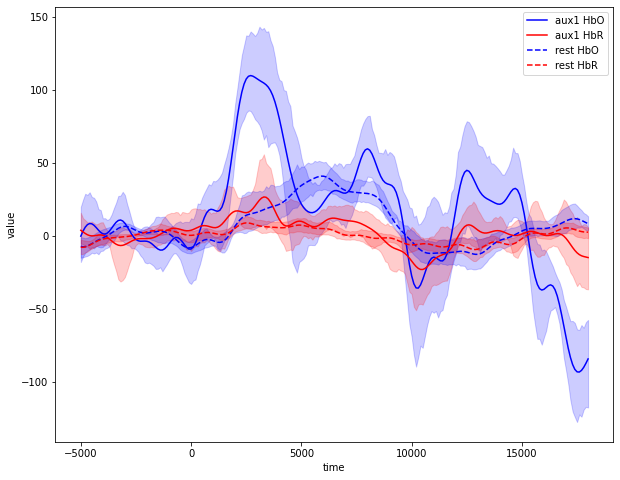

In [85]:
plt.figure(figsize=(10,8))
sns.lineplot(x=hbo_hbr['aux1']['hbo'].time, y=hbo_hbr['aux1']['hbo'].value,color='b',label='aux1 HbO',ci=99)
sns.lineplot(x=hbo_hbr['aux1']['hbr'].time, y=hbo_hbr['aux1']['hbr'].value,color='r',label='aux1 HbR',ci=99)
sns.lineplot(x=hbo_hbr['rest']['hbo'].time, y=hbo_hbr['rest']['hbo'].value,color='b',linestyle='dashed',label='rest HbO',ci=99)
sns.lineplot(x=hbo_hbr['rest']['hbr'].time, y=hbo_hbr['rest']['hbr'].value,color='r',linestyle='dashed',label='rest HbR',ci=99)

plt.legend()
plt.show()

# Dowload file

In [86]:
from google.colab import files

files.download(path_out + file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>